# Explore predictor variables for floor height

Explore correlation between exisiting floor height data and DEM and other building attributes

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Use only points matched to footprint
df_footprint = gpd.read_file('wagga_FFH_footprint_geometry.geojson')

In [4]:
df_footprint.head()

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,Floor_Height,surveyed,index_nexis,LID,LONGITUDE,LATITUDE,STE_CODE,STATE_ABBREV,STATE_NAME,SA1_CODE,SA2_CODE,SA2_Name,SUBURB,POSTCODE,LGA_CODE,LGA_NAME,UCL_CODE,UCL_NAME,NEXIS_USE_II,NEXIS_CONSTRUCTION_TYPE,LOCAL_YEAR_BUILT,NEXIS_YEAR_BUILT,NEXIS_WALL_TYPE,GENERIC_EXT_WALL,flood_vulnerability_function_id,floor_height_(m),floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,distance,index_right,min_height_ahd,max_height_ahd,geometry
0,537819.72,6113103.86,R,0,185.291,185.791,Hammond Ave,0.500,True,14647,RU25K537823611311555,147.415128,-35.124102,1,NSW,New South Wales,11303126705,113031267,Wagga Wagga - East,EAST WAGGA WAGGA,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,SH,1990,1987 - 1991,Veneer Masonry,brick_veneer,FCM7,0.247,24.7,0,1.0,935420,77100,20240506-2121.b13ac.15-9,12.454922,42243,184.977,185.413,"POLYGON ((537841.086 6113104.489, 537840.651 6..."
1,538357.34,6113059.35,R,1,182.526,182.850,Eunony Bridge Rd,0.324,True,14574,RU25K538361611306455,147.421025,-35.124546,1,NSW,New South Wales,11303126713,113031267,Wagga Wagga - East,GUMLY GUMLY,2652,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,SH,1994,1992 - 1996,Veneer Masonry,brick_veneer,FCM7,0.174,17.4,0,1.0,669557,77100,20240506-2121.b13ac.15-9,6.006174,42292,182.436,182.610,"POLYGON ((538369.460 6113071.045, 538355.309 6..."
2,537001.62,6112555.90,R,0,181.376,181.626,Copland St,0.250,True,13309,RU25K537002611255055,147.406137,-35.129227,1,NSW,New South Wales,11303126705,113031267,Wagga Wagga - East,EAST WAGGA WAGGA,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,SH,2022,2022 - 2026,Veneer Masonry,brick_veneer,FCM7,0.190,19.0,0,1.0,925970,77100,20240506-2121.b13ac.15-9,5.360446,41779,181.324,181.724,"POLYGON ((536998.023 6112558.316, 536995.514 6..."
3,538697.76,6113590.44,R,0,190.592,190.792,Gumly Rd,0.200,True,15647,LPI_514518342,147.424739,-35.119769,1,NSW,New South Wales,11303126713,113031267,Wagga Wagga - East,GUMLY GUMLY,2652,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,SH,1994,1992 - 1996,Fibre Cement,lightweight_cladding,FCM1,2.212,221.2,0,1.0,662943,77100,20240506-2121.b13ac.15-9,4.398444,42379,189.557,190.601,"POLYGON ((538693.985 6113610.314, 538694.041 6..."
4,538679.97,6112849.75,R,0,182.466,182.766,Sturt Hwy,0.300,True,14143,GNAF_GANSW712724692,147.424482,-35.126570,1,NSW,New South Wales,11303126713,113031267,Wagga Wagga - East,Gumly Gumly,2652,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,SH,1994,1992 - 1996,Timber,lightweight_cladding,FCM1,3.826,382.6,0,1.0,366524,77100,20240506-2121.b13ac.15-9,12.571391,42281,182.264,182.427,"POLYGON ((538684.886 6112837.070, 538685.512 6..."


In [5]:
df_footprint['Floor_Height_DEM'] = df_footprint['Floor_Leve'] - df_footprint['min_height_ahd']

Correlation: 0.4761710149454041


<Axes: xlabel='Floor_Height', ylabel='Floor_Height_DEM'>

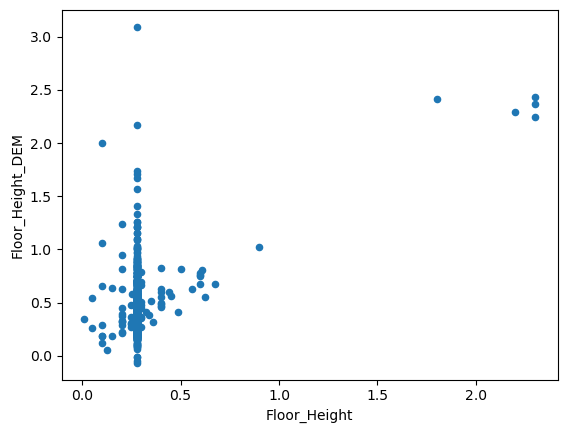

In [6]:
correlation = df_footprint['Floor_Height'].corr(df_footprint['Floor_Height_DEM'])
print(f"Correlation: {correlation}")

df_footprint.plot.scatter('Floor_Height', 'Floor_Height_DEM')

In [7]:
df_footprint['range_dem'] = df_footprint['max_height_ahd'] - df_footprint['min_height_ahd']

### Clean up categorical fields 

make all lower case; take first letter to combine y/yes, n/no etc

In [8]:
cate_cols = ['NEXIS_CONSTRUCTION_TYPE', 'NEXIS_YEAR_BUILT', 'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL', 'flood_vulnerability_function_id']
print(cate_cols)
for col in cate_cols:
    df_footprint[col] = df_footprint[col].str.lower()
    print(df_footprint[col].unique())

['NEXIS_CONSTRUCTION_TYPE', 'NEXIS_YEAR_BUILT', 'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL', 'flood_vulnerability_function_id']
['sh']
['1987 - 1991' '1992 - 1996' '2022 - 2026' '2002 - 2006' '2017 - 2021'
 '1982 - 1986' '1972 - 1976' '2012 - 2016' '1997 - 2001' '1962 - 1971'
 '1977 - 1981' '2007 - 2011']
['veneer masonry' 'fibre cement' 'timber' 'cavity and solid masonry'
 'rc or rm' 'metal sheeting' 'precast concrete']
['brick_veneer' 'lightweight_cladding' 'cavity_masonry']
['fcm7' 'fcm1' 'fcm8' 'fcm10' 'fcm4' 'fcm9' 'fcm11' 'fcm6' 'fcm5' 'fcm3']


In [9]:
df_footprint[cate_cols].describe()

,NEXIS_CONSTRUCTION_TYPE,NEXIS_YEAR_BUILT,NEXIS_WALL_TYPE,GENERIC_EXT_WALL,flood_vulnerability_function_id
count,1872,1872,1872,1872,1872
unique,1,12,7,3,10
top,sh,1987 - 1991,veneer masonry,brick_veneer,fcm7
freq,1872,1393,1394,1394,1078


## Explore regression model using different features


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

### All data points

Explained Variance (R^2): 0.0844
Cross-Validation Accuracy (R^2): 0.1293
RMSE: 0.1791321574115966
['range_dem' 'max_height_ahd' 'min_height_ahd'
 'NEXIS_YEAR_BUILT_1992 - 1996' 'NEXIS_YEAR_BUILT_2012 - 2016'
 'NEXIS_YEAR_BUILT_1962 - 1971' 'NEXIS_YEAR_BUILT_1987 - 1991'
 'flood_vulnerability_function_id_fcm7' 'NEXIS_YEAR_BUILT_2017 - 2021'
 'flood_vulnerability_function_id_fcm8']


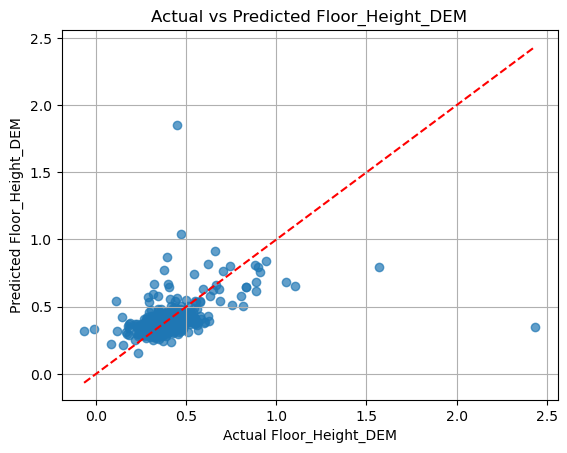

In [11]:

ffh_col = 'Floor_Height_DEM' #'FFH_1m'
df_r = df_footprint

cat_features = ['NEXIS_CONSTRUCTION_TYPE', 'NEXIS_YEAR_BUILT', 'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL', 'flood_vulnerability_function_id']
num_features = ['min_height_ahd', 'max_height_ahd', 'range_dem']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

Explained Variance (R^2): 0.7736
RMSE: 0.09995304866589505


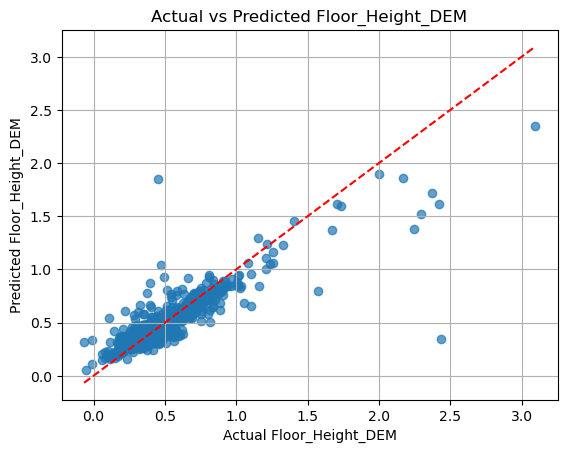

In [12]:
# Make predictions on all points
y_pred = model.predict(X_encoded)

# Calculate explained variance
explained_variance = r2_score(y, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

In [13]:
df_r[np.abs(y_pred-y)>rmse*10]

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,Floor_Height,surveyed,index_nexis,LID,LONGITUDE,LATITUDE,STE_CODE,STATE_ABBREV,STATE_NAME,SA1_CODE,SA2_CODE,SA2_Name,SUBURB,POSTCODE,LGA_CODE,LGA_NAME,UCL_CODE,UCL_NAME,NEXIS_USE_II,NEXIS_CONSTRUCTION_TYPE,LOCAL_YEAR_BUILT,NEXIS_YEAR_BUILT,NEXIS_WALL_TYPE,GENERIC_EXT_WALL,flood_vulnerability_function_id,floor_height_(m),floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,distance,index_right,min_height_ahd,max_height_ahd,geometry,Floor_Height_DEM,range_dem
32,536947.85,6116185.33,R,0,178.959,181.259,Byrnes Rd,2.30,True,18424,RU25K536952611617855,147.405429,-35.096512,1,NSW,New South Wales,11303127122,113031271,Wagga Wagga Surrounds,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1972,1972 - 1976,cavity and solid masonry,cavity_masonry,fcm4,0.355,35.5,0,1.0,676861,77100,20240506-2121.b13ac.15-9,8.043302,43136,178.824,179.102,"POLYGON ((536960.882 6116187.103, 536946.173 6...",2.435,0.278
993,533261.34,6114891.32,R,0,181.250,181.530,Simmons St,0.28,False,17595,GNAF_GANSW706154132,147.364995,-35.108250,1,NSW,New South Wales,11303127026,113031270,Wagga Wagga - West,Wagga Wagga,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,sh,1994,1992 - 1996,veneer masonry,brick_veneer,fcm7,0.158,15.8,2,2.0,1061151,77100,20240506-2121.b13ac.15-9,1.248103,37116,181.080,183.592,"POLYGON ((533264.182 6114886.130, 533278.502 6...",0.450,2.512


**Outliers are confirmed to be incorrect Ground Truth data**

* RU25K536952611617855 - farm house at a large distance from road. Looks like elevated 1 story house. Unlikely to have floor height >2. 
* GNAF_GANSW706154132 - elevated ground floor from streetview, on a plot with high slope. Council estimated floor height of 0.28 most likely incorrect.

In [14]:
df_r[df_r['Floor_Height_DEM']>2]

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,Floor_Height,surveyed,index_nexis,LID,LONGITUDE,LATITUDE,STE_CODE,STATE_ABBREV,STATE_NAME,SA1_CODE,SA2_CODE,SA2_Name,SUBURB,POSTCODE,LGA_CODE,LGA_NAME,UCL_CODE,UCL_NAME,NEXIS_USE_II,NEXIS_CONSTRUCTION_TYPE,LOCAL_YEAR_BUILT,NEXIS_YEAR_BUILT,NEXIS_WALL_TYPE,GENERIC_EXT_WALL,flood_vulnerability_function_id,floor_height_(m),floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,distance,index_right,min_height_ahd,max_height_ahd,geometry,Floor_Height_DEM,range_dem
32,536947.85,6116185.33,R,0,178.959,181.259,Byrnes Rd,2.30,True,18424,RU25K536952611617855,147.405429,-35.096512,1,NSW,New South Wales,11303127122,113031271,Wagga Wagga Surrounds,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1972,1972 - 1976,cavity and solid masonry,cavity_masonry,fcm4,0.355,35.5,0,1.0,676861,77100,20240506-2121.b13ac.15-9,8.043302,43136,178.824,179.102,"POLYGON ((536960.882 6116187.103, 536946.173 6...",2.435,0.278
35,537944.76,6114300.44,R,0,181.703,184.003,Eunony Bridge Rd,2.30,True,16827,RU25K537946611429855,147.416424,-35.113426,1,NSW,New South Wales,11303126810,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,2015,2012 - 2016,timber,lightweight_cladding,fcm1,1.750,175.0,0,1.0,643060,77100,20240506-2121.b13ac.15-9,2.655766,42382,181.756,181.946,"POLYGON ((537952.823 6114312.037, 537935.521 6...",2.247,0.190
47,535093.27,6117173.15,R,0,178.270,180.470,Hampden Ave,2.20,True,18678,RU25K535095611717255,147.385013,-35.087621,1,NSW,New South Wales,11303126810,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1993,1992 - 1996,veneer masonry,brick_veneer,fcm7,0.280,28.0,0,1.0,669557,77100,20240506-2121.b13ac.15-9,2.568294,41179,178.178,178.315,"POLYGON ((535087.792 6117167.535, 535099.672 6...",2.292,0.137
56,531108.64,6115185.59,R,0,178.633,180.433,Flowerdale Rd,1.80,True,17842,RU25K531112611518755,147.341396,-35.105645,1,NSW,New South Wales,11303127034,113031270,Wagga Wagga - West,MOORONG,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1965,1962 - 1971,fibre cement,lightweight_cladding,fcm1,0.657,65.7,0,1.0,643060,77100,20240506-2121.b13ac.15-9,4.818156,35190,178.015,178.984,"POLYGON ((531106.632 6115175.495, 531116.181 6...",2.418,0.969
61,534291.94,6116793.63,R,1,178.908,181.208,Marah St,2.30,True,18644,RU25K534289611679055,147.376187,-35.091096,1,NSW,New South Wales,11303126809,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,sh,1993,1992 - 1996,veneer masonry,brick_veneer,fcm7,0.251,25.1,0,1.0,925970,77100,20240506-2121.b13ac.15-9,4.270965,39799,178.837,179.209,"POLYGON ((534286.680 6116801.114, 534278.961 6...",2.371,0.372
600,530105.82,6113328.92,R,0,185.706,185.986,Alexander St,0.28,False,15104,GNAF_GANSW703953350,147.330399,-35.122445,1,NSW,New South Wales,11303127008,113031270,Wagga Wagga - West,Ashmont,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,sh,1981,1977 - 1981,veneer masonry,brick_veneer,fcm7,0.206,20.6,0,1.0,824083,77100,20240506-2121.b13ac.15-9,1.447010,16275,183.818,186.322,"POLYGON ((530098.488 6113324.912, 530113.177 6...",2.168,2.504
901,534238.70,6113354.30,R,0,191.511,191.791,Railway St,0.28,False,15194,GNAF_GANSW706454324,147.375778,-35.122078,1,NSW,New South Wales,11303126941,113031269,Wagga Wagga - South,Turvey Park,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,sh,1990,1987 - 1991,veneer masonry,brick_veneer,fcm7,0.513,51.3,0,1.0,669242,77100,20240506-2121.b13ac.15-9,0.778616,34205,188.697,192.921,"POLYGON ((534236.725 6113348.791, 534236.112 6...",3.094,4.224


**Outliers are confirmed to be incorrect Ground Truth data**

* RU25K537946611429855 - not visible from street view.
* RU25K535095611717255 - likely 2 storey house. Ground floor not clearly visible from steetview.
* RU25K531112611518755 - no street view
* RU25K534289611679055 - elevated or 2 storey house and ground floor not visible from street view. 
* GNAF_GANSW703953350 - elevated 2 storey house with garage on ground floor, entrance on 2nd.
* GNAF_GANSW706454324 - steep driveway. likely elevated house. Entrance partially blocked from streetview. 

Explained Variance (R^2): 0.4983
Cross-Validation Accuracy (R^2): 0.2038
RMSE: 0.1436552110721427
['range_dem' 'max_height_ahd' 'min_height_ahd'
 'NEXIS_YEAR_BUILT_1992 - 1996' 'NEXIS_YEAR_BUILT_1962 - 1971'
 'NEXIS_YEAR_BUILT_2012 - 2016' 'flood_vulnerability_function_id_fcm7'
 'NEXIS_YEAR_BUILT_1987 - 1991' 'flood_vulnerability_function_id_fcm8'
 'NEXIS_YEAR_BUILT_2017 - 2021']


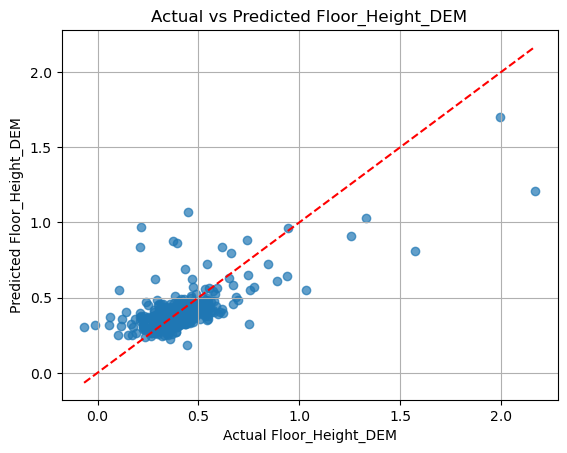

In [15]:
## exclude outlier 

ffh_col = 'Floor_Height_DEM' #'FFH_1m'
df_r = df_footprint[np.abs(y_pred-y)<=rmse*10]

cat_features = ['NEXIS_CONSTRUCTION_TYPE', 'NEXIS_YEAR_BUILT', 'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL', 'flood_vulnerability_function_id']
num_features = ['min_height_ahd', 'max_height_ahd', 'range_dem']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

Explained Variance (R^2): 0.8281
RMSE: 0.08495732101762628


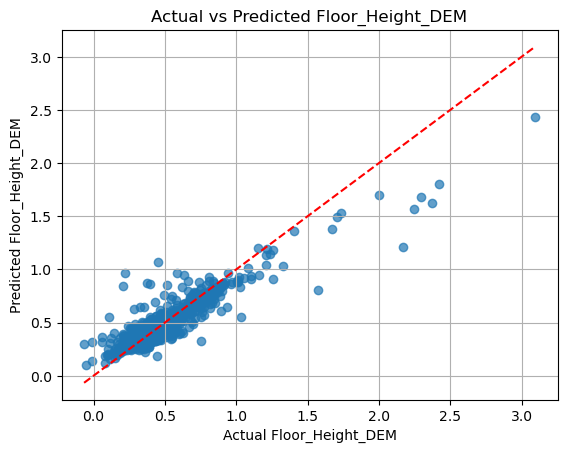

In [16]:
# Make predictions on all points
y_pred = model.predict(X_encoded)

# Calculate explained variance
explained_variance = r2_score(y, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

### Only survey data 

For surveyed data, floor height from surveyed ground and floor elevations are more reliable

Explained Variance (R^2): -0.2787
Cross-Validation Accuracy (R^2): -0.1573
RMSE: 0.5901507031089588
['range_dem' 'NEXIS_YEAR_BUILT_2012 - 2016'
 'flood_vulnerability_function_id_fcm4' 'NEXIS_YEAR_BUILT_1962 - 1971'
 'min_height_ahd' 'max_height_ahd' 'NEXIS_YEAR_BUILT_1972 - 1976'
 'GENERIC_EXT_WALL_lightweight_cladding'
 'flood_vulnerability_function_id_fcm1' 'NEXIS_WALL_TYPE_fibre cement']


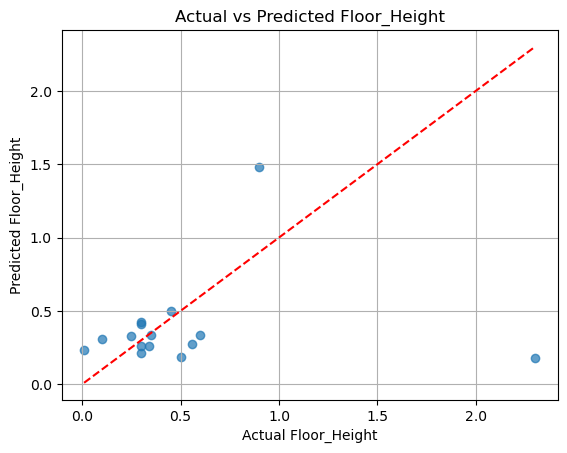

In [17]:
ffh_col = 'Floor_Height' #'FFH_1m'
df_r = df_footprint[df_footprint['surveyed']==True]

cat_features = ['NEXIS_CONSTRUCTION_TYPE', 'NEXIS_YEAR_BUILT', 'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL', 'flood_vulnerability_function_id']
num_features = ['min_height_ahd', 'max_height_ahd', 'range_dem']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

Explained Variance (R^2): 0.5749
RMSE: 0.33308800101643776


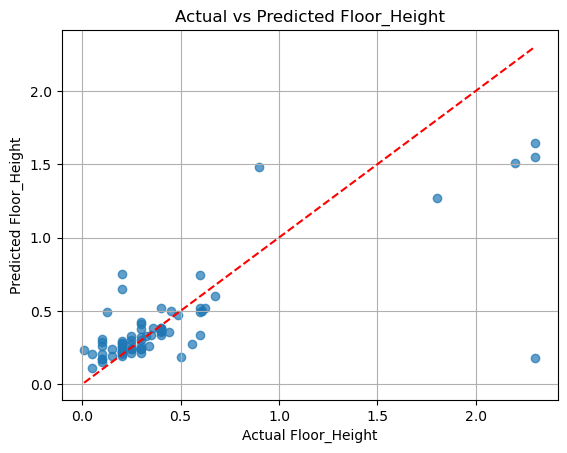

In [18]:
# Make predictions on all points
y_pred = model.predict(X_encoded)

# Calculate explained variance
explained_variance = r2_score(y, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

In [19]:
df_r[np.abs(y_pred-y)>rmse*5]

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,Floor_Height,surveyed,index_nexis,LID,LONGITUDE,LATITUDE,STE_CODE,STATE_ABBREV,STATE_NAME,SA1_CODE,SA2_CODE,SA2_Name,SUBURB,POSTCODE,LGA_CODE,LGA_NAME,UCL_CODE,UCL_NAME,NEXIS_USE_II,NEXIS_CONSTRUCTION_TYPE,LOCAL_YEAR_BUILT,NEXIS_YEAR_BUILT,NEXIS_WALL_TYPE,GENERIC_EXT_WALL,flood_vulnerability_function_id,floor_height_(m),floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,distance,index_right,min_height_ahd,max_height_ahd,geometry,Floor_Height_DEM,range_dem
61,534291.94,6116793.63,R,1,178.908,181.208,Marah St,2.3,True,18644,RU25K534289611679055,147.376187,-35.091096,1,NSW,New South Wales,11303126809,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,sh,1993,1992 - 1996,veneer masonry,brick_veneer,fcm7,0.251,25.1,0,1.0,925970,77100,20240506-2121.b13ac.15-9,4.270965,39799,178.837,179.209,"POLYGON ((534286.680 6116801.114, 534278.961 6...",2.371,0.372


In [20]:
df_r[df_r['Floor_Height']>1.5]

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,Floor_Height,surveyed,index_nexis,LID,LONGITUDE,LATITUDE,STE_CODE,STATE_ABBREV,STATE_NAME,SA1_CODE,SA2_CODE,SA2_Name,SUBURB,POSTCODE,LGA_CODE,LGA_NAME,UCL_CODE,UCL_NAME,NEXIS_USE_II,NEXIS_CONSTRUCTION_TYPE,LOCAL_YEAR_BUILT,NEXIS_YEAR_BUILT,NEXIS_WALL_TYPE,GENERIC_EXT_WALL,flood_vulnerability_function_id,floor_height_(m),floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,distance,index_right,min_height_ahd,max_height_ahd,geometry,Floor_Height_DEM,range_dem
32,536947.85,6116185.33,R,0,178.959,181.259,Byrnes Rd,2.3,True,18424,RU25K536952611617855,147.405429,-35.096512,1,NSW,New South Wales,11303127122,113031271,Wagga Wagga Surrounds,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1972,1972 - 1976,cavity and solid masonry,cavity_masonry,fcm4,0.355,35.5,0,1.0,676861,77100,20240506-2121.b13ac.15-9,8.043302,43136,178.824,179.102,"POLYGON ((536960.882 6116187.103, 536946.173 6...",2.435,0.278
35,537944.76,6114300.44,R,0,181.703,184.003,Eunony Bridge Rd,2.3,True,16827,RU25K537946611429855,147.416424,-35.113426,1,NSW,New South Wales,11303126810,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,2015,2012 - 2016,timber,lightweight_cladding,fcm1,1.750,175.0,0,1.0,643060,77100,20240506-2121.b13ac.15-9,2.655766,42382,181.756,181.946,"POLYGON ((537952.823 6114312.037, 537935.521 6...",2.247,0.190
47,535093.27,6117173.15,R,0,178.270,180.470,Hampden Ave,2.2,True,18678,RU25K535095611717255,147.385013,-35.087621,1,NSW,New South Wales,11303126810,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1993,1992 - 1996,veneer masonry,brick_veneer,fcm7,0.280,28.0,0,1.0,669557,77100,20240506-2121.b13ac.15-9,2.568294,41179,178.178,178.315,"POLYGON ((535087.792 6117167.535, 535099.672 6...",2.292,0.137
56,531108.64,6115185.59,R,0,178.633,180.433,Flowerdale Rd,1.8,True,17842,RU25K531112611518755,147.341396,-35.105645,1,NSW,New South Wales,11303127034,113031270,Wagga Wagga - West,MOORONG,2650,17750,Wagga Wagga,131001,Remainder of State/Territory (NSW),Residential,sh,1965,1962 - 1971,fibre cement,lightweight_cladding,fcm1,0.657,65.7,0,1.0,643060,77100,20240506-2121.b13ac.15-9,4.818156,35190,178.015,178.984,"POLYGON ((531106.632 6115175.495, 531116.181 6...",2.418,0.969
61,534291.94,6116793.63,R,1,178.908,181.208,Marah St,2.3,True,18644,RU25K534289611679055,147.376187,-35.091096,1,NSW,New South Wales,11303126809,113031268,Wagga Wagga - North,NORTH WAGGA WAGGA,2650,17750,Wagga Wagga,112019,Wagga Wagga,Residential,sh,1993,1992 - 1996,veneer masonry,brick_veneer,fcm7,0.251,25.1,0,1.0,925970,77100,20240506-2121.b13ac.15-9,4.270965,39799,178.837,179.209,"POLYGON ((534286.680 6116801.114, 534278.961 6...",2.371,0.372


Explained Variance (R^2): 0.0154
Cross-Validation Accuracy (R^2): -0.2328
RMSE: 0.21701946650671378
['range_dem' 'flood_vulnerability_function_id_fcm4'
 'NEXIS_YEAR_BUILT_2012 - 2016' 'min_height_ahd'
 'NEXIS_YEAR_BUILT_1962 - 1971' 'max_height_ahd'
 'NEXIS_YEAR_BUILT_1972 - 1976' 'NEXIS_WALL_TYPE_fibre cement'
 'GENERIC_EXT_WALL_lightweight_cladding'
 'flood_vulnerability_function_id_fcm7']


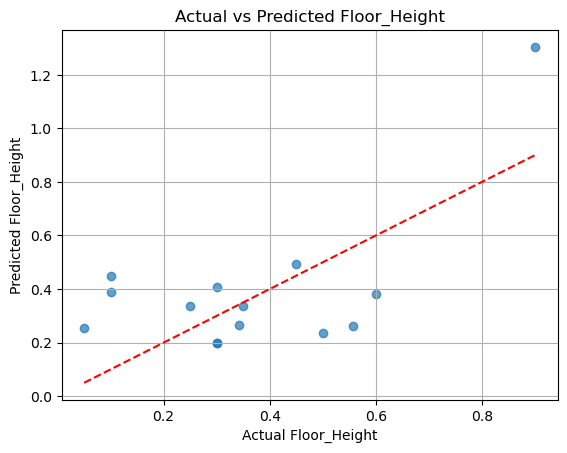

In [21]:
## exclude outlier 

ffh_col = 'Floor_Height' #'FFH_1m'
df_r = df_r[np.abs(y_pred-y)<=rmse*5]

cat_features = ['NEXIS_CONSTRUCTION_TYPE', 'NEXIS_YEAR_BUILT', 'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL', 'flood_vulnerability_function_id']
num_features = ['min_height_ahd', 'max_height_ahd', 'range_dem']

# Prepare the features and target variable
X = df_r[cat_features+num_features]
y = df_r[ffh_col]

# One-hot encode categorical variables
encoder = OneHotEncoder()#sparse=False)
X_encoded_categorical = encoder.fit_transform(X[cat_features]).toarray()

# Normalize numeric features
scaler = StandardScaler()
X_normalized_numeric = scaler.fit_transform(X[num_features])

# Concatenate the encoded categorical features with the normalized numeric features
X_encoded = np.hstack((X_encoded_categorical, X_normalized_numeric))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate explained variance
explained_variance = r2_score(y_test, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print(f"Cross-Validation Accuracy (R^2): {mean_cv_score:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)

# Assuming 'model' is your trained RandomForestRegressor and X_encoded contains feature names
importances = model.feature_importances_
# Get the feature names (assuming you have them stored somewhere)
feature_names = np.array(encoder.get_feature_names_out())
all_feature_names = np.concatenate((feature_names, num_features))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print(all_feature_names[indices][:10])

Explained Variance (R^2): 0.7383
RMSE: 0.23694799825820811


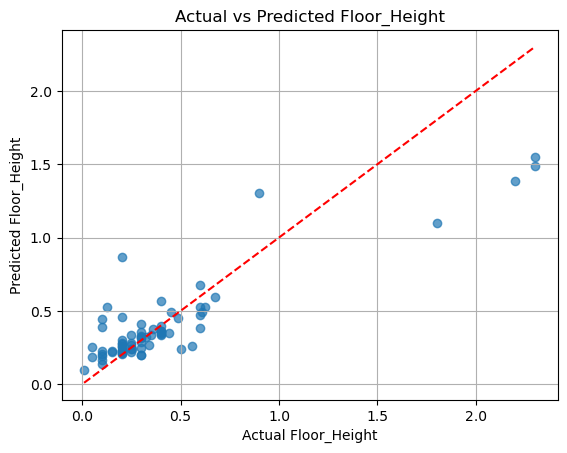

In [22]:
# Make predictions on all points
y_pred = model.predict(X_encoded)

# Calculate explained variance
explained_variance = r2_score(y, y_pred)
print(f"Explained Variance (R^2): {explained_variance:.4f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")

plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title(f'Actual vs Predicted {ffh_col}')
plt.xlabel(f'Actual {ffh_col}')
plt.ylabel(f'Predicted {ffh_col}')
plt.grid(True)